### 배운 것
1. 한 figure에 여러 그래프 그리기
2. mark, linestyle, color 조정
3. subplot으로 그래프 나누어 그리기
    - sharey 옵션으로 y축 범위 맞추기
4. Datetime 타입 시계열 데이터 활용하기
5. twin axes 활용하기
    - ticks 색깔주기
6. 주석 달고, 화살표 그리기

# IMDb 데이터로 배운 것 활용해보기
### dataframe 만들기

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [370]:
PATH = os.getenv('HOME') + '/data/'
df1 = pd.read_csv(PATH + "IMDb movies.csv")
df2 = pd.read_csv(PATH + "MoviesOnStreamingPlatforms_updated.csv")
# Innerjoin csvs
df = pd.merge(df1, df2, left_on='original_title', right_on='Title', how='inner')
df.drop_duplicates('original_title', inplace=True)
df.dropna(subset=['IMDb','Rotten Tomatoes'], inplace=True)
# 8.9/10 64/100 to 89 64
df.loc[:,'IMDb'] = df.loc[:,'IMDb'].map(lambda x:int(float(x[:3]) * 10))
df.loc[:,'Rotten Tomatoes'] = df.loc[:,'Rotten Tomatoes'].map(lambda x:int(x[:2]))
df_copy = df.copy()
df

/Users/taekkim/.conda/envs/aiffel/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,tt0003772,Cinderella,Cinderella,1914,1914-12-28,"Fantasy, Drama",52,USA,English,James Kirkwood,...,0,0,1,1,0,Kay Cannon,"Comedy,Family,Fantasy,Musical,Romance","United Kingdom,United States",English,NaN
4,tt0004457,The Patchwork Girl of Oz,The Patchwork Girl of Oz,1914,1914-09-28,"Adventure, Family, Fantasy",81,USA,English,J. Farrell MacDonald,...,0,0,1,0,0,J. Farrell MacDonald,"Adventure,Family,Fantasy,Comedy",United States,"None,English",81.0
5,tt0004465,The Perils of Pauline,The Perils of Pauline,1914,1914-03-23,"Action, Adventure, Drama",199,USA,English,"Louis J. Gasnier, Donald MacKenzie",...,0,0,1,0,0,George Marshall,"Biography,Comedy,Drama,Music",United States,English,96.0
8,tt0004873,Alice in Wonderland,Alice in Wonderland,1915,1915-01-19,"Adventure, Family, Fantasy",52,USA,English,W.W. Young,...,0,0,0,1,0,Tim Burton,"Adventure,Family,Fantasy","United States,United Kingdom",English,108.0
14,tt0005078,The Cheat,The Cheat,1915,1915-12-13,"Drama, Romance",59,USA,English,Cecil B. DeMille,...,0,0,1,0,0,NaN,"Action,Drama,Sci-Fi",Turkey,"Turkish,English,Spanish,German,French,Portuguese",20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5953,tt9844368,Out of Liberty,Out of Liberty,2019,2019-09-13,"Drama, Western",111,USA,English,Garrett Batty,...,0,0,1,0,0,Garrett Batty,"Drama,Western",United States,English,111.0
5954,tt9860728,Falling Inn Love - Ristrutturazione con amore,Falling Inn Love,2019,2019-08-29,"Comedy, Romance",98,USA,English,Roger Kumble,...,1,0,0,0,0,Roger Kumble,"Comedy,Romance",United States,English,98.0
5955,tt9866700,Paranormal Investigation,Paranormal Investigation,2018,2018-12-01,"Horror, Thriller",92,France,French,Franck Phelizon,...,1,0,0,0,0,Franck Phelizon,"Horror,Thriller",France,French,92.0
5956,tt9887580,Bulletproof 2,Bulletproof 2,2020,2020-01-07,"Action, Comedy",97,USA,English,Don Michael Paul,...,1,0,0,0,0,Don Michael Paul,"Action,Comedy",United States,English,97.0


In [294]:
df = df.sort_values(by='votes', ascending=False)[:20]
df.set_index('date_published', inplace=True)
df.sort_index(inplace=True)
df

,imdb_title_id,title,original_title,year,genre,duration,country,language,director,writer,...,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
date_published,,,,,,,,,,,,,,,,,,,,,
1985-01-11,tt0088247,Terminator,The Terminator,1984,"Action, Sci-Fi",107,"UK, USA","English, Spanish",James Cameron,"James Cameron, Gale Anne Hurd",...,0,1,0,0,0,James Cameron,"Action,Sci-Fi","United Kingdom,United States","English,Spanish",107.0
1991-12-19,tt0103064,Terminator 2 - Il giorno del giudizio,Terminator 2: Judgment Day,1991,"Action, Sci-Fi",137,"USA, France","English, Spanish",James Cameron,"James Cameron, William Wisher",...,1,0,0,0,0,James Cameron,"Action,Sci-Fi",United States,"English,Spanish",137.0
1994-11-25,tt0110357,The Lion King,The Lion King,1994,"Animation, Adventure, Drama",88,USA,"English, Swahili, Xhosa, Zulu","Roger Allers, Rob Minkoff","Irene Mecchi, Jonathan Roberts",...,0,0,0,1,0,"Roger Allers,Rob Minkoff","Animation,Adventure,Drama,Family,Musical",United States,"English,Swahili,Xhosa,Zulu",88.0
1996-03-22,tt0114709,Toy Story - Il mondo dei giocattoli,Toy Story,1995,"Animation, Adventure, Comedy",81,USA,English,John Lasseter,"John Lasseter, Pete Docter",...,0,0,0,1,0,John Lasseter,"Animation,Adventure,Comedy,Family,Fantasy",United States,English,81.0
1999-10-29,tt0137523,Fight Club,Fight Club,1999,Drama,139,"USA, Germany",English,David Fincher,"Chuck Palahniuk, Jim Uhls",...,0,0,1,0,0,David Fincher,Drama,"Germany,United States",English,139.0
2002-03-15,tt0198781,Monsters & Co.,"Monsters, Inc.",2001,"Animation, Adventure, Comedy",92,USA,English,"Pete Docter, David Silverman","Pete Docter, Jill Culton",...,0,0,0,1,0,NaN,"Animation,Adventure,Comedy,Family,Fantasy",United States,English,22.0
2003-09-05,tt0325980,La maledizione della prima luna,Pirates of the Caribbean: The Curse of the Bla...,2003,"Action, Adventure, Fantasy",143,USA,English,Gore Verbinski,"Ted Elliott, Terry Rossio",...,0,0,0,1,0,Gore Verbinski,"Action,Adventure,Fantasy",United States,English,143.0
2003-12-03,tt0266543,Alla ricerca di Nemo,Finding Nemo,2003,"Animation, Adventure, Comedy",100,"USA, Australia",English,"Andrew Stanton, Lee Unkrich","Andrew Stanton, Andrew Stanton",...,0,0,0,1,0,"Andrew Stanton,Lee Unkrich","Animation,Adventure,Comedy,Family",United States,English,100.0
2005-06-17,tt0372784,Batman Begins,Batman Begins,2005,"Action, Adventure",140,"USA, UK","English, Mandarin",Christopher Nolan,"Bob Kane, David S. Goyer",...,0,1,0,0,0,Christopher Nolan,"Action,Adventure","United Kingdom,United States","English,Mandarin",140.0


In [225]:
print(df['IMDb'].dtype, df['Rotten Tomatoes'].dtype)

int64 int64


### Top voted 10 movies, Rotten Tomatoes & IMDb scores
- 한 figure에 여러 그래프 그리기

/var/folders/z_/fl1l3lj16n55t2wwqw4xkcw80000gn/T/ipykernel_71534/375423388.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


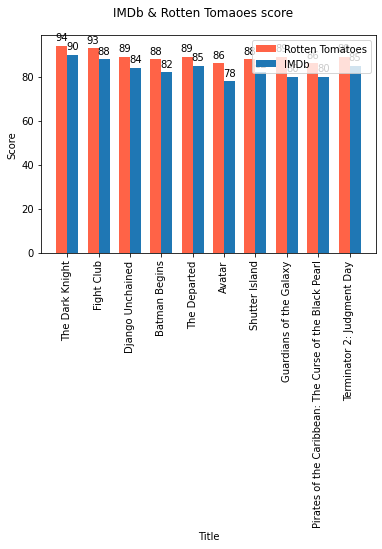

In [364]:
fig, ax = plt.subplots()
x = np.arange(len(df['original_title']))
width = 0.35
rects1 = ax.bar(x - width/2, df['Rotten Tomatoes'], width, label='Rotten Tomatoes', color='tomato')
rects2 = ax.bar(x + width/2, df['IMDb'], width, label='IMDb')
ax.legend(['Rotten Tomatoes','IMDb'])
ax.set_xticks(x)
ax.set_xticklabels(df['original_title'])
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_xlabel('Title')
ax.set_ylabel('Score')
plt.xticks(rotation=90)
plt.suptitle('IMDb & Rotten Tomaoes score')
fig.tight_layout()
plt.show()

### 20-09~20-10, Rotten Tomatoes & IMDb scores comparison
- mark, line_style, color 조정

In [236]:
df = df_copy.copy()
df.set_index('date_published', inplace=True)
df.sort_index(inplace=True)
df_last = df.loc["2020-09-01":"2020-10-31"]
df_last

,imdb_title_id,title,original_title,year,genre,duration,country,language,director,writer,...,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
date_published,,,,,,,,,,,,,,,,,,,,,
2020-09-03,tt8179024,Body Cam,Body Cam,2020,"Horror, Mystery, Thriller",96,USA,English,Malik Vitthal,"Nicholas McCarthy, Richmond Riedel",...,0,1,0,0,0,Malik Vitthal,"Horror,Mystery,Thriller",United States,English,96.0
2020-09-09,tt9067182,Rocks,Rocks,2019,Drama,93,UK,English,Sarah Gavron,"Theresa Ikoko, Theresa Ikoko",...,1,0,0,0,0,Sarah Gavron,Drama,United Kingdom,English,93.0
2020-09-11,tt3661394,L'unico e insuperabile Ivan,The One and Only Ivan,2020,"Animation, Adventure, Comedy",95,USA,English,Thea Sharrock,"Mike White, Katherine Applegate",...,0,0,0,1,0,Thea Sharrock,"Adventure,Comedy,Drama,Family,Fantasy",United States,English,95.0
2020-09-23,tt5723282,Endless,Endless,2020,"Drama, Fantasy, Romance",95,USA,English,Scott Speer,"Andre Case, Andre Case",...,0,1,0,0,0,Scott Speer,"Drama,Fantasy,Romance",United States,English,95.0
2020-09-24,tt6149154,Waiting for the Barbarians,Waiting for the Barbarians,2019,Drama,112,"Italy, USA",English,Ciro Guerra,"J.M. Coetzee, J.M. Coetzee",...,0,1,0,0,0,Ciro Guerra,Drama,"Italy,United States",English,112.0
2020-09-25,tt4106514,The Postcard Killings,The Postcard Killings,2020,"Crime, Drama, Mystery",104,"UK, USA","English, Swedish, Russian, German, French",Danis Tanovic,"Andrew Stern, Ellen Furman",...,0,1,0,0,0,Danis Tanovic,"Crime,Drama,Thriller","United Kingdom,United States","Dutch,English,Swedish,Russian,German,French",104.0
2020-09-28,tt7423486,Escape and Evasion,Escape and Evasion,2019,"Drama, War",92,"Australia, United Arab Emirates",English,Storm Ashwood,Storm Ashwood,...,0,0,1,0,0,Storm Ashwood,"Drama,War","Australia,United Arab Emirates",English,92.0
2020-10-02,tt5362940,Eternal Beauty,Eternal Beauty,2019,"Comedy, Drama, Romance",95,UK,English,Craig Roberts,Craig Roberts,...,0,0,1,0,0,Craig Roberts,"Comedy,Drama,Romance",United Kingdom,English,95.0
2020-10-23,tt7557108,Saint Maud,Saint Maud,2019,"Drama, Horror, Mystery",84,UK,"English, Welsh",Rose Glass,Rose Glass,...,0,1,0,0,0,Rose Glass,"Drama,Horror,Mystery",United Kingdom,"English,Welsh",84.0


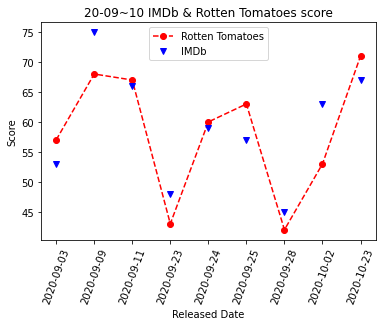

In [366]:
fig, ax = plt.subplots()
ax.plot(df_last.index, df_last['Rotten Tomatoes'], marker='o', linestyle='--', color='r')
ax.plot(df_last.index, df_last['IMDb'], marker='v', linestyle='None', color='b')
ax.legend(['Rotten Tomatoes','IMDb'])
ax.set_xlabel('Released Date')
ax.set_ylabel('Score')
plt.xticks(rotation=70)
plt.title('20-09~10 IMDb & Rotten Tomatoes score')
plt.show()

### 2010-2020 yearly movies rotten tomatoes & IMDb scroes
3. suplots로 그래프 나누어 그리기, annotate 활용

In [367]:
df = df_copy.copy()

In [368]:
yearly_imdb_mean = []
yearly_imdb_25 = []
yearly_imdb_75 = []
yearly_rotten_tomatto_mean = []
yearly_rotten_tomatto_25 = []
yearly_rotten_tomatto_75 = []

In [277]:
len(list(range(2010,2021)))

11

In [279]:
for y in range(2010,2021):
    yearly_imdb_mean.append(df[df['year'] == y]['IMDb'].mean())
    yearly_imdb_25.append(df[df['year'] == y]['IMDb'].quantile(q=0.25))
    yearly_imdb_75.append(df[df['year'] == y]['IMDb'].quantile(q=0.75))
    yearly_rotten_tomatto_mean.append(df[df['year'] == y]['Rotten Tomatoes'].mean())
    yearly_rotten_tomatto_25.append(df[df['year'] == y]['Rotten Tomatoes'].quantile(q=0.25))
    yearly_rotten_tomatto_75.append(df[df['year'] == y]['Rotten Tomatoes'].quantile(q=0.75))

In [281]:
yearly_imdb_mean = np.round(yearly_imdb_mean, 0)
yearly_rotten_tomatto_mean = np.round(yearly_rotten_tomatto_mean, 0)

In [282]:
print(yearly_imdb_mean)
print(yearly_imdb_25)
print(yearly_imdb_75)
print(yearly_rotten_tomatto_mean)
print(yearly_rotten_tomatto_25)
print(yearly_rotten_tomatto_75)

[63. 61. 60. 59. 62. 62. 59. 60. 59. 62. 56.]
[57.0, 54.75, 54.0, 54.25, 57.0, 53.0, 52.75, 53.5, 54.25, 55.0, 48.0]
[71.0, 71.0, 66.0, 65.0, 68.5, 71.0, 66.25, 65.5, 64.0, 71.25, 63.25]
[61. 60. 58. 61. 62. 63. 64. 64. 66. 55. 55.]
[53.0, 50.0, 49.0, 54.0, 54.0, 54.0, 57.75, 57.0, 61.0, 44.0, 48.0]
[70.0, 69.0, 67.0, 69.75, 70.0, 74.0, 72.0, 71.0, 66.0, 63.25, 60.0]


In [274]:
years = list(range(2010,2021))
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

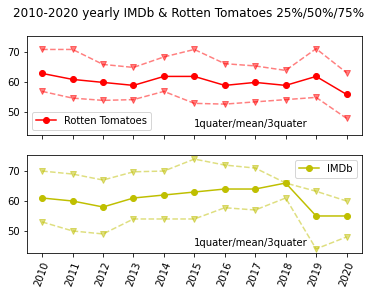

In [350]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True)
ax[0].plot(years, yearly_imdb_mean, marker='o', color='r')
ax[0].plot(years, yearly_imdb_25, marker='v', linestyle='--',color='r', alpha=0.5)
ax[0].plot(years, yearly_imdb_75, marker='v', linestyle='--',color='r', alpha=0.5)
ax[0].annotate('1quater/mean/3quater', xy=[2015, 45])
ax[0].legend(['Rotten Tomatoes'])
ax[1].plot(years, yearly_rotten_tomatto_mean, marker='o', color='y')
ax[1].plot(years, yearly_rotten_tomatto_25, marker='v', linestyle='--',color='y', alpha=0.5)
ax[1].plot(years, yearly_rotten_tomatto_75, marker='v', linestyle='--',color='y', alpha=0.5)
ax[1].legend(['IMDb'])
ax[1].annotate('1quater/mean/3quater', xy=[2015, 45])
plt.xticks(years, rotation=70)
plt.suptitle('2010-2020 yearly IMDb & Rotten Tomatoes 25%/50%/75%')
plt.show()

### Top voted 10 movies, runtime and votes
4. twin axes 활용, ticks 색깔주기

In [371]:
df = df_copy.copy()
df = df.sort_values(by='votes', ascending=False)[:10]
df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
2947,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,2008-07-23,"Action, Crime, Drama",152,"USA, UK","English, Mandarin",Christopher Nolan,...,0,1,0,0,0,Christopher Nolan,"Action,Crime,Drama,Thriller","United States,United Kingdom","English,Mandarin",152.0
2177,tt0137523,Fight Club,Fight Club,1999,1999-10-29,Drama,139,"USA, Germany",English,David Fincher,...,0,0,1,0,0,David Fincher,Drama,"Germany,United States",English,139.0
3963,tt1853728,Django Unchained,Django Unchained,2012,2013-01-17,"Drama, Western",165,USA,"English, German, French, Italian",Quentin Tarantino,...,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
2692,tt0372784,Batman Begins,Batman Begins,2005,2005-06-17,"Action, Adventure",140,"USA, UK","English, Mandarin",Christopher Nolan,...,0,1,0,0,0,Christopher Nolan,"Action,Adventure","United Kingdom,United States","English,Mandarin",140.0
2786,tt0407887,The Departed - Il bene e il male,The Departed,2006,2006-10-27,"Crime, Drama, Thriller",151,USA,"English, Cantonese",Martin Scorsese,...,1,0,0,0,0,Martin Scorsese,"Crime,Drama,Thriller","United States,Hong Kong SAR China","English,Cantonese",151.0
3015,tt0499549,Avatar,Avatar,2009,2010-01-15,"Action, Adventure, Fantasy",162,USA,"English, Spanish",James Cameron,...,0,0,0,1,0,NaN,"Animation,Action,Adventure,Family,Fantasy,Mystery",United States,English,23.0
3402,tt1130884,Shutter Island,Shutter Island,2010,2010-03-05,"Mystery, Thriller",138,USA,"English, German",Martin Scorsese,...,1,0,0,0,0,Martin Scorsese,"Mystery,Thriller",United States,"English,German",138.0
4047,tt2015381,Guardiani della Galassia,Guardians of the Galaxy,2014,2014-10-22,"Action, Adventure, Comedy",121,USA,English,James Gunn,...,0,0,0,1,0,James Gunn,"Action,Adventure,Comedy,Sci-Fi",United States,English,121.0
2608,tt0325980,La maledizione della prima luna,Pirates of the Caribbean: The Curse of the Bla...,2003,2003-09-05,"Action, Adventure, Fantasy",143,USA,English,Gore Verbinski,...,0,0,0,1,0,Gore Verbinski,"Action,Adventure,Fantasy",United States,English,143.0
1713,tt0103064,Terminator 2 - Il giorno del giudizio,Terminator 2: Judgment Day,1991,1991-12-19,"Action, Sci-Fi",137,"USA, France","English, Spanish",James Cameron,...,1,0,0,0,0,James Cameron,"Action,Sci-Fi",United States,"English,Spanish",137.0


In [372]:
df.loc[3015, 'Runtime'] = 162.0

/var/folders/z_/fl1l3lj16n55t2wwqw4xkcw80000gn/T/ipykernel_71534/1822758239.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['title'], rotation=90)


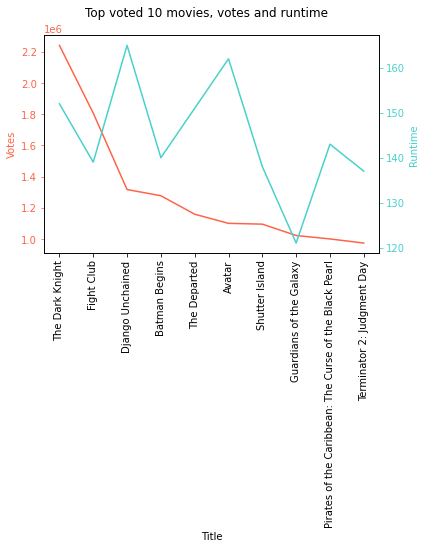

In [373]:
fig, ax = plt.subplots()
ax.plot(df['original_title'], df['votes'], color='tomato')
ax.set_xlabel('Title')
ax.set_xticklabels(df['title'], rotation=90)
ax.set_ylabel('Votes', color='tomato')
ax.tick_params('y', colors='tomato')
ax2 = ax.twinx()
ax2.plot(df['original_title'], df['Runtime'], color='mediumturquoise')
ax2.set_ylabel('Runtime', color='mediumturquoise')
ax2.tick_params('y', colors='mediumturquoise')
plt.suptitle('Top voted 10 movies, votes and runtime')
plt.show()